<a href="https://colab.research.google.com/github/wndnjs2037/2022_BigDataProgramming/blob/main/project/final/%EB%B9%85%EB%8D%B0%EC%9D%B4%ED%84%B0%ED%94%84%EB%A1%9C%EA%B7%B8%EB%9E%98%EB%B0%8D_%EC%B5%9C%EC%A2%85_%EB%B0%9C%ED%91%9C_%EB%B6%84%EC%84%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# 설정 관련 코드

In [2]:
# !sudo apt-get install -y fonts-nanum
# !sudo fc-cache -fv
# !rm ~/.cache/matplotlib -rf

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.datasets import fetch_20newsgroups_vectorized
from sklearn.feature_selection import chi2
from sklearn.feature_selection import RFE
from sklearn.ensemble import ExtraTreesClassifier
from sklearn import datasets
from sklearn import metrics
import types
from sklearn.manifold import TSNE
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
%matplotlib inline
import seaborn as sns
sns.set(style="darkgrid", palette="bright", font_scale=1.5)

plt.rc('font', family='NanumGothic')
plt.rcParams['figure.figsize'] = [8,5]

# 빅데이터 프로그래밍 최종 발표 관련 분석


## 1. 범죄 관련 데이터

### 1) 범죄자 생활 수준 정도

In [4]:
#. KOSIS 데이터 기준
# 범죄자의 사회 인구학적 특성 분석을 위함
# 살인, 강간/강제추행, 절도, 강도, 폭력 의 5개 강력범죄 위주 분석 - 소계로 분석
# 2016~2020 5년간의 데이터로 상중하류 분포를 막대그래프로 확인

In [5]:
df = pd.read_csv("/content/drive/MyDrive/빅데이터프로그래밍/범죄자_생활정도_5대범죄소계_2016-2020.csv", encoding='cp949')
df.head(5)

,division,2016-하류,2016-중류,2016-상류,2017-하류,2017-중류,2017-상류,2018-하류,2018-중류,2018-상류,2019-하류,2019-중류,2019-상류,2020-하류,2020-중류,2020-상류
0,범죄 합계,234658,132550,4226,221388,130318,3891,204783,126217,3954,204323,130475,3848,186709,124556,3810


In [6]:
df = df.set_index('division') 
df = df.transpose() 

df

division,범죄 합계
2016-하류,234658
2016-중류,132550
2016-상류,4226
2017-하류,221388
2017-중류,130318
2017-상류,3891
2018-하류,204783
2018-중류,126217
2018-상류,3954
2019-하류,204323


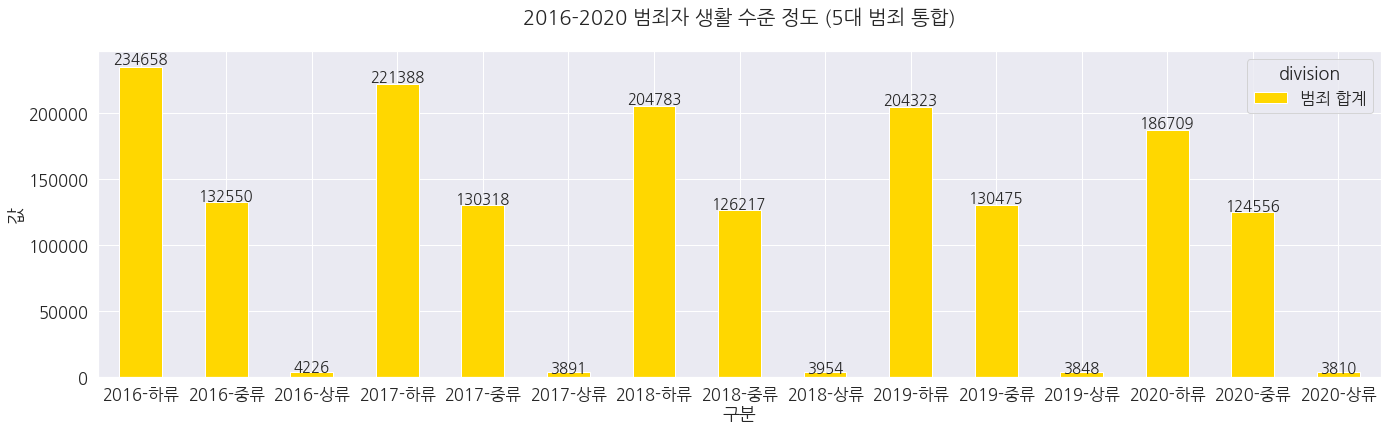

In [7]:
df = pd.read_csv("/content/drive/MyDrive/빅데이터프로그래밍/범죄자_생활정도_5대범죄소계_2016-2020.csv", encoding='cp949')

df = df.set_index('division') 
df = df.transpose() 

colors = ['gold'] #색상 지정
df = df.plot(kind='bar', figsize=(23,6), rot=0, color=colors, width=0.5)
plt.title("2016-2020 범죄자 생활 수준 정도 (5대 범죄 통합)\n", fontsize=20)

for p in df.patches: #막대그래프 개수만큼 반복
    left, bottom, width, height = p.get_bbox().bounds
    df.annotate("%.0f" %(height), (left+width/2, height*1.01), ha='center', fontsize=15) #값 표시

plt.xlabel('구분')
plt.ylabel('값')
#plt.legend(loc=(1.01,0), fontsize=15)

df

In [8]:
df


In [9]:
# 상중하류를 구분짓는 기준 또한 찾아보려고 했으나, 이는 수사관들이 수사를 통해 파악한 사항을 입력한 값으로 만들어진 데이터여서
# 뚜렷한 구분이 없었다는 점이 아쉬웠습니다.
# https://kosis.kr/civilComplaint/qnaDetail.do?boardIdx=14133

# 어쨌든 결과는 하류가 60%정도, 중류가 30%정도이며 상류는 1%의 비율을 차지하고 있습니다.

### 2) 범죄자 범행 동기

In [10]:
# 범죄자의 범행 동기를 파이그래프로 시각화
# 눈으로 데이터를 봤을 때에는 생활비, 우발적, 부주의가 많다.
# 2016-2020 데이터로 분석하며, 연도별로 나누어서 구현한다.
# 살인, 강간/강제추행, 절도, 강도, 폭력 의 5개 강력범죄 위주 분석 - 편의를 위해 통합한 데이터로 분석
# 각 범죄당 비율 얼만큼 차지하는지는 중간 발표때 말했으므로 언급하고 지나가기

In [11]:
df1 = pd.read_csv('/content/drive/MyDrive/빅데이터프로그래밍/범죄자_범행동기(통합)_2016-2020.csv', encoding='cp949')
df1 = df1.set_index('division')
df1

,2016-이욕,2016-사행심,2016-보복,2016-가정불화,2016-호기심,2016-유혹,2016-우발적,2016-현실불만,2016-부주의,2017-이욕,...,2019-부주의,2020-이욕,2020-사행심,2020-보복,2020-가정불화,2020-호기심,2020-유혹,2020-우발적,2020-현실불만,2020-부주의
division,,,,,,,,,,,,,,,,,,,,,
살인 범죄,23,1,8,81,0,0,377,60,9,22,...,5,11,1,10,58,0,3,305,44,9
강도 범죄,746,26,3,1,5,26,290,20,13,583,...,10,507,27,1,3,8,7,230,3,8
강간/강제추행 범죄,678,20,2,79,1618,811,7176,101,603,627,...,683,630,79,2,69,888,639,8174,30,568
절도 범죄,30853,1600,7,71,4680,2170,29117,295,3162,30220,...,3351,24558,1854,2,35,2799,1070,31334,180,3319
폭력 범죄,3236,231,390,23648,542,114,137411,4155,4678,2937,...,3263,2517,315,221,17763,434,79,130940,2293,2976
범죄 통합,35536,1878,410,23880,6845,3121,174371,4631,8465,34389,...,7312,28223,2276,236,17928,4129,1798,170983,2550,6880


In [12]:
crime_merge_motive_2016 = pd.read_csv('/content/drive/MyDrive/빅데이터프로그래밍/범죄자_범행동기(통합)_2016-2020.csv', encoding='cp949')
crime_merge_motive_2016 = crime_merge_motive_2016.drop(index=[0,1,2,3,4], axis=0)
crime_merge_motive_2016 = crime_merge_motive_2016.drop(columns=['2017-이욕','2017-사행심','2017-보복','2017-가정불화','2017-호기심','2017-유혹','2017-우발적','2017-현실불만','2017-부주의',
                                        '2018-이욕','2018-사행심','2018-보복','2018-가정불화','2018-호기심','2018-유혹','2018-우발적','2018-현실불만','2018-부주의',
                                        '2019-이욕','2019-사행심','2019-보복','2019-가정불화','2019-호기심','2019-유혹','2019-우발적','2019-현실불만','2019-부주의'
                                        ,'2020-이욕','2020-사행심','2020-보복','2020-가정불화','2020-호기심','2020-유혹','2020-우발적','2020-현실불만','2020-부주의'], axis=0)
crime_merge_motive_2016 = crime_merge_motive_2016.set_index('division')
crime_merge_motive_2016 = crime_merge_motive_2016.transpose()
crime_merge_motive_2016 = crime_merge_motive_2016.sort_values('범죄 통합')
crime_merge_motive_2016

division,범죄 통합
2016-보복,410
2016-사행심,1878
2016-유혹,3121
2016-현실불만,4631
2016-호기심,6845
2016-부주의,8465
2016-가정불화,23880
2016-이욕,35536
2016-우발적,174371


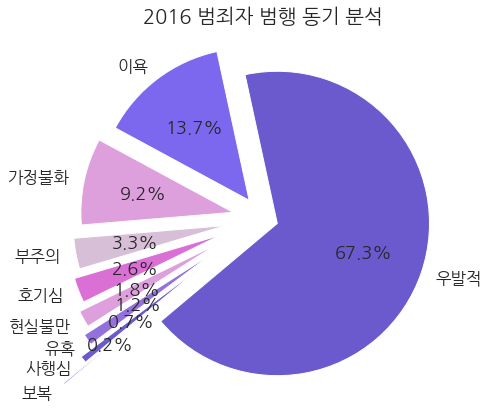

In [13]:
fig = plt.figure(figsize=(7,7))
explode = [0.7,0.5,0.4,0.35,0.3,0.25,0.2,0.15,0.1]
colors = ['mediumslateblue', 'slateblue', 'mediumpurple','plum', 'orchid', 'thistle', 'plum']
labels=['보복','사행심','유혹','현실불만','호기심','부주의','가정불화','이욕','우발적']
plt.pie(crime_merge_motive_2016['범죄 통합'], labels=labels, autopct='%.1f%%', startangle=220, counterclock=False, explode=explode, colors=colors)
plt.title("2016 범죄자 범행 동기 분석", fontsize=20)
#plt.figure(figsize=(5,5))
#plt.legend(loc=(1.3,0), fontsize=15)
plt.show()

In [14]:
crime_merge_motive_2017 = pd.read_csv('/content/drive/MyDrive/빅데이터프로그래밍/범죄자_범행동기(통합)_2016-2020.csv', encoding='cp949')
crime_merge_motive_2017 = crime_merge_motive_2017.drop(index=[0,1,2,3,4], axis=0)
crime_merge_motive_2017 = crime_merge_motive_2017.drop(columns=['2016-이욕','2016-사행심','2016-보복','2016-가정불화','2016-호기심','2016-유혹','2016-우발적','2016-현실불만','2016-부주의',
                                        '2018-이욕','2018-사행심','2018-보복','2018-가정불화','2018-호기심','2018-유혹','2018-우발적','2018-현실불만','2018-부주의',
                                        '2019-이욕','2019-사행심','2019-보복','2019-가정불화','2019-호기심','2019-유혹','2019-우발적','2019-현실불만','2019-부주의'
                                        ,'2020-이욕','2020-사행심','2020-보복','2020-가정불화','2020-호기심','2020-유혹','2020-우발적','2020-현실불만','2020-부주의'], axis=0)
crime_merge_motive_2017 = crime_merge_motive_2017.set_index('division')
crime_merge_motive_2017 = crime_merge_motive_2017.transpose()
crime_merge_motive_2017 = crime_merge_motive_2017.sort_values('범죄 통합')
crime_merge_motive_2017

division,범죄 통합
2017-보복,272
2017-사행심,2020
2017-유혹,3073
2017-현실불만,4112
2017-호기심,6353
2017-부주의,8475
2017-가정불화,20568
2017-이욕,34389
2017-우발적,170853


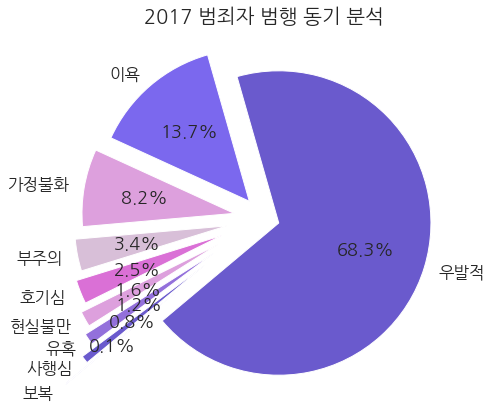

In [15]:
fig = plt.figure(figsize=(7,7))
explode = [0.7,0.5,0.4,0.35,0.3,0.25,0.2,0.15,0.1]
colors = ['mediumslateblue', 'slateblue', 'mediumpurple','plum', 'orchid', 'thistle', 'plum']
labels=['보복','사행심','유혹','현실불만','호기심','부주의','가정불화','이욕','우발적']
plt.pie(crime_merge_motive_2017['범죄 통합'], labels=labels, autopct='%.1f%%', startangle=220, counterclock=False, explode=explode, colors=colors)
plt.title("2017 범죄자 범행 동기 분석", fontsize=20)
#plt.figure(figsize=(5,5))
#plt.legend(loc=(1.3,0), fontsize=15)
plt.show()

In [16]:
crime_merge_motive_2018 = pd.read_csv('/content/drive/MyDrive/빅데이터프로그래밍/범죄자_범행동기(통합)_2016-2020.csv', encoding='cp949')
crime_merge_motive_2018 = crime_merge_motive_2018.drop(index=[0,1,2,3,4], axis=0)
crime_merge_motive_2018 = crime_merge_motive_2018.drop(columns=['2016-이욕','2016-사행심','2016-보복','2016-가정불화','2016-호기심','2016-유혹','2016-우발적','2016-현실불만','2016-부주의',
                                        '2017-이욕','2017-사행심','2017-보복','2017-가정불화','2017-호기심','2017-유혹','2017-우발적','2017-현실불만','2017-부주의',
                                        '2019-이욕','2019-사행심','2019-보복','2019-가정불화','2019-호기심','2019-유혹','2019-우발적','2019-현실불만','2019-부주의'
                                        ,'2020-이욕','2020-사행심','2020-보복','2020-가정불화','2020-호기심','2020-유혹','2020-우발적','2020-현실불만','2020-부주의'], axis=0)
crime_merge_motive_2018 = crime_merge_motive_2018.set_index('division')
crime_merge_motive_2018 = crime_merge_motive_2018.transpose()
crime_merge_motive_2018 = crime_merge_motive_2018.sort_values('범죄 통합')
crime_merge_motive_2018

division,범죄 통합
2018-보복,234
2018-사행심,2020
2018-유혹,2162
2018-호기심,2694
2018-현실불만,3058
2018-부주의,7064
2018-가정불화,18548
2018-이욕,28489
2018-우발적,178753


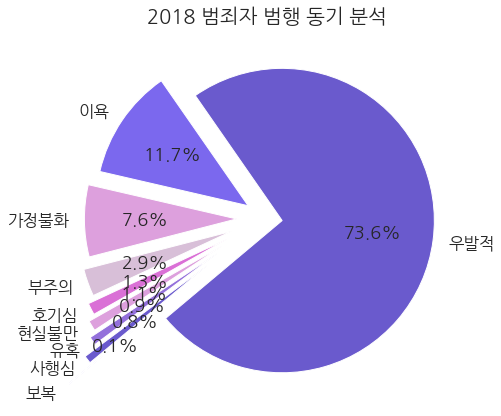

In [17]:
fig = plt.figure(figsize=(7,7))
explode = [0.7,0.5,0.4,0.35,0.3,0.25,0.2,0.15,0.1]
colors = ['mediumslateblue', 'slateblue', 'mediumpurple','plum', 'orchid', 'thistle', 'plum']
labels=['보복','사행심','유혹','현실불만','호기심','부주의','가정불화','이욕','우발적']
plt.pie(crime_merge_motive_2018['범죄 통합'], labels=labels, autopct='%.1f%%', startangle=220, counterclock=False, explode=explode, colors=colors)
plt.title("2018 범죄자 범행 동기 분석", fontsize=20)
#plt.figure(figsize=(5,5))
#plt.legend(loc=(1.3,0), fontsize=15)
plt.show()

In [18]:
crime_merge_motive_2019 = pd.read_csv('/content/drive/MyDrive/빅데이터프로그래밍/범죄자_범행동기(통합)_2019_sort.csv', encoding='cp949')
crime_merge_motive_2019 = crime_merge_motive_2019.drop(index=[0,1,2,3,4], axis=0)
# crime_merge_motive_2019 = crime_merge_motive_2019.drop(columns=['2016-이욕','2016-사행심','2016-보복','2016-가정불화','2016-호기심','2016-유혹','2016-우발적','2016-현실불만','2016-부주의',
#                                         '2017-이욕','2017-사행심','2017-보복','2017-가정불화','2017-호기심','2017-유혹','2017-우발적','2017-현실불만','2017-부주의',
#                                         '2018-이욕','2018-사행심','2018-보복','2018-가정불화','2018-호기심','2018-유혹','2018-우발적','2018-현실불만','2018-부주의'
#                                         ,'2020-이욕','2020-사행심','2020-보복','2020-가정불화','2020-호기심','2020-유혹','2020-우발적','2020-현실불만','2020-부주의'], axis=0)
crime_merge_motive_2019 = crime_merge_motive_2019.set_index('division')
crime_merge_motive_2019 = crime_merge_motive_2019.transpose()
#crime_merge_motive_2019 = crime_merge_motive_2019.sort_values('범죄 통합')
crime_merge_motive_2019

division,범죄 통합
2019-보복,244
2019-유혹,2001
2019-사행심,2160
2019-호기심,2833
2019-현실불만,2889
2019-부주의,7312
2019-가정불화,20751
2019-이욕,28848
2019-우발적,183835


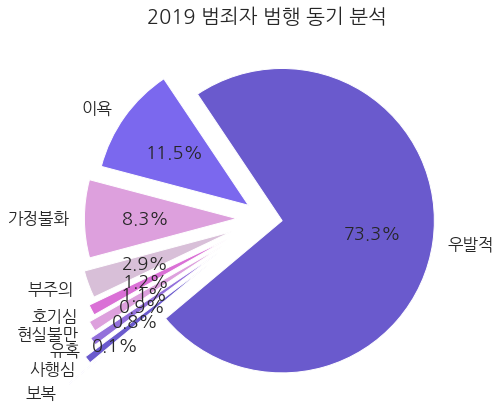

In [19]:
fig = plt.figure(figsize=(7,7))
explode = [0.7,0.5,0.4,0.35,0.3,0.25,0.2,0.15,0.1]
colors = ['mediumslateblue', 'slateblue', 'mediumpurple','plum', 'orchid', 'thistle', 'plum']
labels=['보복','사행심','유혹','현실불만','호기심','부주의','가정불화','이욕','우발적']
plt.pie(crime_merge_motive_2019['범죄 통합'], labels=labels, autopct='%.1f%%', startangle=220, counterclock=False, explode=explode, colors=colors)
plt.title("2019 범죄자 범행 동기 분석", fontsize=20)
#plt.figure(figsize=(5,5))
#plt.legend(loc=(1.3,0), fontsize=15)
plt.show()

In [20]:
crime_merge_motive_2020 = pd.read_csv('/content/drive/MyDrive/빅데이터프로그래밍/범죄자_범행동기(통합)_2016-2020.csv', encoding='cp949')
crime_merge_motive_2020 = crime_merge_motive_2020.drop(index=[0,1,2,3,4], axis=0)
crime_merge_motive_2020 = crime_merge_motive_2020.drop(columns=['2016-이욕','2016-사행심','2016-보복','2016-가정불화','2016-호기심','2016-유혹','2016-우발적','2016-현실불만','2016-부주의',
                                        '2017-이욕','2017-사행심','2017-보복','2017-가정불화','2017-호기심','2017-유혹','2017-우발적','2017-현실불만','2017-부주의',
                                        '2018-이욕','2018-사행심','2018-보복','2018-가정불화','2018-호기심','2018-유혹','2018-우발적','2018-현실불만','2018-부주의'
                                        ,'2019-이욕','2019-사행심','2019-보복','2019-가정불화','2019-호기심','2019-유혹','2019-우발적','2019-현실불만','2019-부주의'], axis=0)
crime_merge_motive_2020 = crime_merge_motive_2020.set_index('division')
crime_merge_motive_2020 = crime_merge_motive_2020.transpose()
crime_merge_motive_2020 = crime_merge_motive_2020.sort_values('범죄 통합')
crime_merge_motive_2020

division,범죄 통합
2020-보복,236
2020-유혹,1798
2020-사행심,2276
2020-현실불만,2550
2020-호기심,4129
2020-부주의,6880
2020-가정불화,17928
2020-이욕,28223
2020-우발적,170983


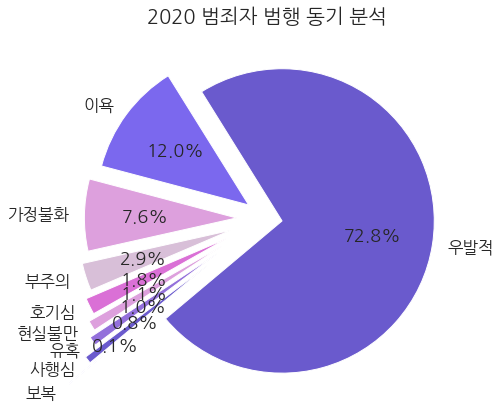

In [21]:
fig = plt.figure(figsize=(7,7))
explode = [0.7,0.5,0.4,0.35,0.3,0.25,0.2,0.15,0.1]
colors = ['mediumslateblue', 'slateblue', 'mediumpurple','plum', 'orchid', 'thistle', 'plum']
labels=['보복','사행심','유혹','현실불만','호기심','부주의','가정불화','이욕','우발적']
plt.pie(crime_merge_motive_2020['범죄 통합'], labels=labels, autopct='%.1f%%', startangle=220, counterclock=False, explode=explode, colors=colors)
plt.title("2020 범죄자 범행 동기 분석", fontsize=20)
#plt.figure(figsize=(5,5))
#plt.legend(loc=(1.3,0), fontsize=15)
plt.show()

In [22]:
# 마찬가지로 미상과 기타 사유는 제외하고 분석했습니다.
# (이욕 - 생활비, 유흥비, 도박비, 허영 사치심 등의 소계 값등의 통합이라고 보면 됨)
# 시각화 결과를 보면 우발적인 범죄가 가장 많았고, 그 다음으로는 이욕과 가정불화가 따릅니다.
# 우발적인 범죄는 순간의 선택이 잘못되어서, 감정적인 문제 등으로 인해 저지르는 경우인데 대부분의 범죄가 우발적이기 때문에 이에 대한 교육이나 사전에 방지할만한 제도를 구축하는 것 또한 중요사항이라 생각됩니다.

### 3) 재범자 재범 종류 및 기간


In [23]:
repeated_crime = pd.read_csv('/content/drive/MyDrive/빅데이터프로그래밍/재범자_재범종류_및_기간_2016-2020_5년평균_시각화용.csv', encoding='cp949')
repeated_crime

,division,동종-1개월이내,동종-3개월이내,동종-6개월이내,동종-1년이내,동종-2년이내,동종-3년이내,동종-3년초과,이종-1개월이내,이종-3개월이내,이종-6개월이내,이종-1년이내,이종-2년이내,이종-3년이내,이종-3년초과
0,살인 범죄,3,2,3,9,7,10,17,9,15,22,75,47,46,236
1,강도 범죄,34,37,29,66,33,32,54,34,49,60,166,92,87,200
2,강간/강제추행 범죄,50,77,86,298,210,191,420,190,332,434,1526,1122,1173,5483
3,절도 범죄,2617,2870,2563,6513,3073,2617,4136,1421,1839,1831,5267,3316,3246,16341
4,폭력 범죄,1644,3024,3312,9811,6177,5596,14339,1948,3977,5148,17827,14105,14297,64239
5,repeated_crime_total,4347,6010,5992,16697,9499,8446,18966,3601,6212,7494,24860,18681,18848,86499
6,item,동종-1개월이내,동종-3개월이내,동종-6개월이내,동종-1년이내,동종-2년이내,동종-3년이내,동종-3년초과,이종-1개월이내,이종-3개월이내,이종-6개월이내,이종-1년이내,이종-2년이내,이종-3년이내,이종-3년초과


In [24]:
#repeated_crime = repeated_crime.set_index('division') 
repeated_crime = repeated_crime.transpose()

repeated_crime

,0,1,2,3,4,5,6
division,살인 범죄,강도 범죄,강간/강제추행 범죄,절도 범죄,폭력 범죄,repeated_crime_total,item
동종-1개월이내,3,34,50,2617,1644,4347,동종-1개월이내
동종-3개월이내,2,37,77,2870,3024,6010,동종-3개월이내
동종-6개월이내,3,29,86,2563,3312,5992,동종-6개월이내
동종-1년이내,9,66,298,6513,9811,16697,동종-1년이내
동종-2년이내,7,33,210,3073,6177,9499,동종-2년이내
동종-3년이내,10,32,191,2617,5596,8446,동종-3년이내
동종-3년초과,17,54,420,4136,14339,18966,동종-3년초과
이종-1개월이내,9,34,190,1421,1948,3601,이종-1개월이내
이종-3개월이내,15,49,332,1839,3977,6212,이종-3개월이내


In [25]:
repeated_crime = pd.DataFrame({'crime':['동종-1개월이내', '동종-3개월이내', '동종-6개월이내', '동종-1년이내', '동종-2년이내', '동종-3년이내', '동종-3년초과',
                                        '이종-1개월이내', '이종-3개월이내', '이종-6개월이내', '이종-1년이내', '이종-2년이내', '이종-3년이내', '이종-3년초과'], 
                              'repeated_crime_total':[4347,6010,5992,16697,9499,8446,18966,3601,6212,7494,24860,18681,18848,86499]})
repeated_crime

,crime,repeated_crime_total
0,동종-1개월이내,4347
1,동종-3개월이내,6010
2,동종-6개월이내,5992
3,동종-1년이내,16697
4,동종-2년이내,9499
5,동종-3년이내,8446
6,동종-3년초과,18966
7,이종-1개월이내,3601
8,이종-3개월이내,6212
9,이종-6개월이내,7494


In [26]:
repeated_crime_same = pd.DataFrame({'crime':['동종-1개월이내', '동종-3개월이내', '동종-6개월이내', '동종-1년이내', '동종-2년이내', '동종-3년이내', '동종-3년초과'], 
                              'repeated_crime_same_total':[4347,6010,5992,16697,9499,8446,18966]})
repeated_crime_same

,crime,repeated_crime_same_total
0,동종-1개월이내,4347
1,동종-3개월이내,6010
2,동종-6개월이내,5992
3,동종-1년이내,16697
4,동종-2년이내,9499
5,동종-3년이내,8446
6,동종-3년초과,18966


Text(0.5, 1.0, '2016-2020 재범자 평균 재범 기간(동종)\n')

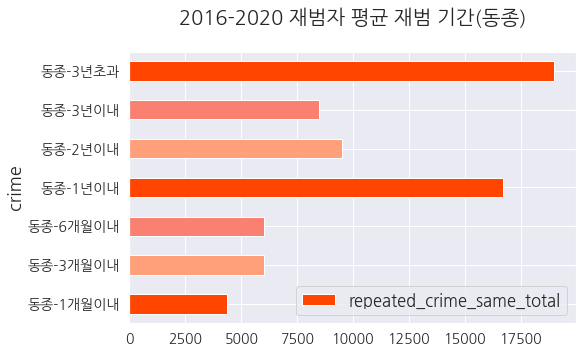

In [27]:
my_colors = ['orangered', 'lightsalmon', 'salmon'] 
repeated_crime_same.plot.barh(x='crime', y='repeated_crime_same_total', rot=0, fontsize=14, figsize=(8,5), color=my_colors)
plt.title("2016-2020 재범자 평균 재범 기간(동종)\n", fontsize=20)

In [28]:
repeated_crime_different = pd.DataFrame({'crime':['이종-1개월이내', '이종-3개월이내', '이종-6개월이내', '이종-1년이내', '이종-2년이내', '이종-3년이내', '이종-3년초과'], 
                              'repeated_crime_different_total':[3601,6212,7494,24860,18681,18848,86499]})
repeated_crime_different

,crime,repeated_crime_different_total
0,이종-1개월이내,3601
1,이종-3개월이내,6212
2,이종-6개월이내,7494
3,이종-1년이내,24860
4,이종-2년이내,18681
5,이종-3년이내,18848
6,이종-3년초과,86499


Text(0.5, 1.0, '2016-2020 재범자 평균 재범 기간(이종)\n')

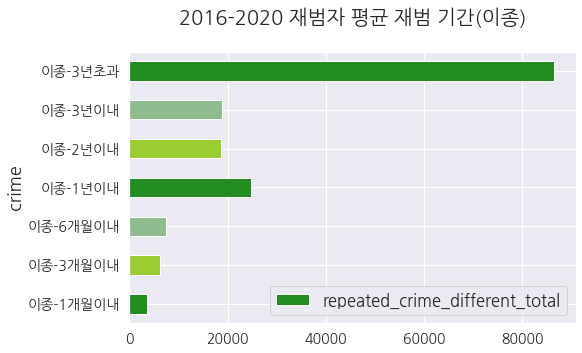

In [29]:
my_colors = ['forestgreen', 'yellowgreen', 'darkseagreen'] 
repeated_crime_different.plot.barh(x='crime', y='repeated_crime_different_total', rot=0, fontsize=14, figsize=(8,5), color=my_colors)
plt.title("2016-2020 재범자 평균 재범 기간(이종)\n", fontsize=20)

In [30]:
# (상대적으로 강력한 범죄인 살인 강도 강간은 비율이 적고 절도, 폭력 범죄가 대부분을 차지)

# 이후 기간이 모두 포함된 3년초과의 데이터를 고려하고 본다면
# 1년이내 동종 범죄 재범율은 20에서 25%대로, 재범의 경우는 보통 6개월 이상 1년 이내에 많이 일어남

# 이종 범죄의 경우에도 3년 초과의 데이터를 고려하고 본다면 1년 이내가 높은 측에 속한다. 
# 이를 통해 6개월에서 1년사이의 범죄자들에게 각별한 주의가 요함을 알 수 있다.

## 행복지수 관련 데이터

### 1) 행복지수 상위 10개국 살인 발생율 비교

In [31]:
# # 행복지수가 높은 나라 상위 10개국의 살인 범죄 발생 데이터를 한국과 비교
# 데이터는 KOSIS 2014-2018년 OECD 국가 살인 범죄 발생 데이터셋을 기준으로 한다 => 5년간의 평균 값으로 측정

# 행복지수 순위
# 1. 핀란드
# 2. 덴마크
# 3. 아이슬랜드
# 4. 스위스
# 5. 네덜란드
# 6. 룩셈부르크
# 7. 스웨덴
# 8. 노르웨이
# 9. 이스라엘
# 10. 뉴질랜드
# 59. 한국

# 10만명당 살인 범죄 발생 비율 순위
# 0.52	노르웨이
# 0.56	스위스
# 0.66	한국
# 0.66	네덜란드
# 0.7	룩셈부르크
# 0.72	아이슬란드
# 0.925	뉴질랜드
# 1.06	스웨덴
# 1.12	덴마크
# 1.4	이스라엘
# 1.46	핀란드

In [41]:
murder_OECD = pd.read_csv('/content/drive/MyDrive/빅데이터프로그래밍/범죄발생_OECD__행복지수상위10개국.csv', encoding='cp949')
murder_OECD

,국가별,2014-살인건수,2014-10만명당 살인비율,2015-살인건수,2015-10만명당 살인비율,2016-살인건수,2016-10만명당 살인비율,2017-살인건수,2017-10만명당 살인비율,2018-살인건수,2018-10만명당 살인비율,"2014-2018 Average murder rate per 100,000 people"
0,한국,377,0.7,375,0.7,361,0.7,301,0.6,309,0.60,0.66
1,이스라엘,108,1.4,110,1.4,104,1.3,123,1.5,-,-,1.40
2,덴마크,74,1.3,62,1.1,56,1.0,71,1.2,58,1.00,1.12
3,핀란드,88,1.6,82,1.5,74,1.3,69,1.3,90,1.60,1.46
4,아이슬란드,2,0.6,3,0.9,1,0.3,3,0.9,3,0.90,0.72
5,룩셈부르크,4,0.7,5,0.9,5,0.9,2,0.3,-,-,0.70
6,네덜란드,123,0.7,104,0.6,94,0.6,132,0.8,100,0.60,0.66
7,노르웨이,29,0.6,24,0.5,27,0.5,28,0.5,25,0.50,0.52
8,스웨덴,87,0.9,112,1.1,106,1.1,113,1.1,108,1.10,1.06
9,스위스,41,0.5,57,0.7,45,0.5,45,0.5,50,0.60,0.56


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



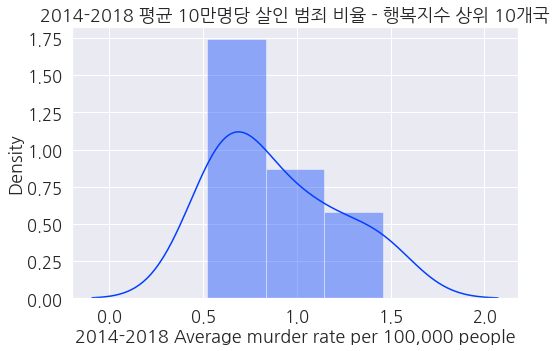

In [42]:
murder_OECD = sns.distplot(murder_OECD['2014-2018 Average murder rate per 100,000 people'])
murder_OECD.set_title("2014-2018 평균 10만명당 살인 범죄 비율 - 행복지수 상위 10개국")
plt.show()

In [68]:
country = ['한국', '핀란드','덴마크', '아이슬란드','스위스','네덜란드','룩셈부르크','스웨덴','노르웨이','이스라엘','뉴질랜드']
temp = [0.66,1.46,1.12,0.72,0.56,0.66,0.7,1.06,0.52,1.4,0.925]
num = [345,81,64,2,48,111,4,105,27,111,44]


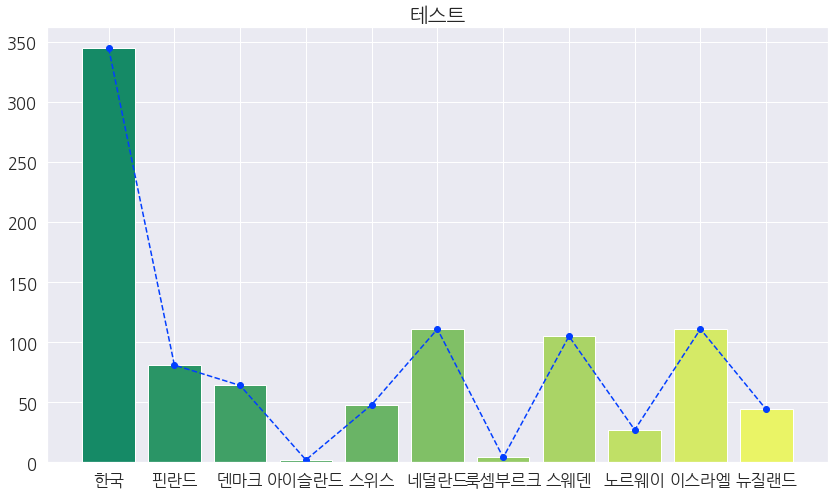

In [69]:
fig = plt.figure(figsize=(14,8)) ## Figure 생성 
fig.set_facecolor('white') ## Figure 배경색 지정
 
colors = sns.color_palette('summer', len(country)) ## 바 차트 색상
 
xtick_label_position = list(range(len(country))) ## x축 눈금 라벨이 표시될 x좌표
plt.xticks(xtick_label_position, country) ## x축 눈금 라벨 출력
 
plt.bar(xtick_label_position, num, color=colors) ## 바차트 출력
plt.plot(xtick_label_position, num, color='b',
         linestyle='--', marker='o') ## 선 그래프 출력
plt.title('테스트', fontsize=20)
plt.show()

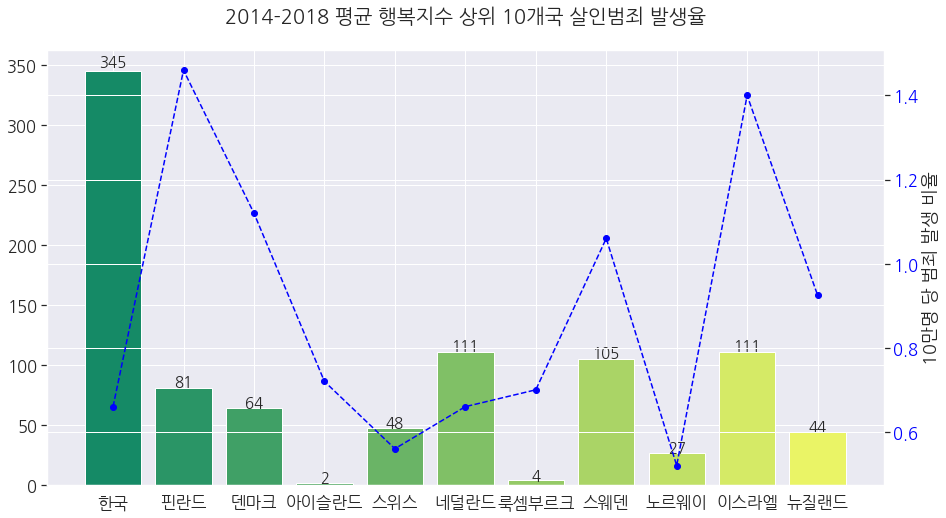

In [70]:
fig = plt.figure(figsize=(15,8)) ## Figure 생성 
fig.set_facecolor('white') ## Figure 배경색 지정
ax1 = fig.add_subplot() ## axes 생성
 
colors = sns.color_palette('summer', len(country)) ## 바 차트 색상
 
xtick_label_position = list(range(len(country))) ## x축 눈금 라벨이 표시될 x좌표
ax1.set_xticks(xtick_label_position) ## x축 눈금 
ax1.set_xticklabels(country) ## x축 눈금 라벨
ax1.bar(xtick_label_position, num, color=colors) ## 바차트 출력
 
color = 'blue'
ax2 = ax1.twinx() ## 새로운 axis 생성
ax2.plot(xtick_label_position, temp, color=color, linestyle='--', marker='o') ## 선 그래프 
ax2.tick_params(axis='y', labelcolor=color) ## 눈금 라벨 색상 지정

for p in ax1.patches: #막대그래프 개수만큼 반복
    left, bottom, width, height = p.get_bbox().bounds
    ax1.annotate("%.0f" %(height), (left+width/2, height*1.01), ha='center', fontsize=15) #값 표시

plt.xlabel('국가')
plt.ylabel('10만명 당 범죄 발생 비율')
 
plt.title('2014-2018 평균 행복지수 상위 10개국 살인범죄 발생율\n', fontsize=20)
plt.show()

In [ ]:
# 핀란드는 1위지만 살인 범죄율은 가장 높음.
# 상위 10개국에 한국을 포함해서 계산하면 한국은 하위 3위로, 행복지수는 50위 이상 차이가 나지만 살인 비율은 낮음을 알 수 있다.
# -> 아는 행복지수가 범죄와의 직접적인 연관이 있는 것 만은 아니라는 것을 알 수 있다.
# 그 나라의 치안이나 분위기, 처벌 정도, 시민의식등이 많이 포함되어 있을 것이기 때문에 절대적인 데이터라고 볼 순 없겠지만 행복지수와 범죄는 선형적으로 연관되어 있지는 않은 것 같습니다.

## 추가분석


### 1) GDP 상위 10개국의 범죄 발생율

In [ ]:
# 2020년 GDP 순위로 데이터 측정 - OECD 국가 기준

# 국가별	2020-국내총생산(GDP)(당해년 가격) (10억US$)
# 미국	20936.6
# 독일	3806.1
# 영국	2707.7
# 프랑스	2603
# 이탈리아	1886.4
# 캐나다	1643.4
# 한국	1638.2
# 오스트레일리아	1330.9
# 스페인	1281.2
# 멕시코	1076.2


In [71]:
country_GDP10_OECD = pd.read_csv('/content/drive/MyDrive/빅데이터프로그래밍/범죄발생_OECD__2014-2018_GDP상위10개국.csv', encoding='cp949')
country_GDP10_OECD

,division,"2014-2018 Average murder rate per 100,000 people",2014-2018 Average Number of Murders
0,미국,16191.6,5.00
1,독일,792.4,0.96
2,영국,728.8,1.10
3,프랑스,856.2,1.34
4,이탈리아,412.0,0.70
5,캐나다,611.0,1.70
6,한국,344.6,0.66
7,오스트레일리아,226.2,0.92
8,스페인,303.2,0.64
9,멕시코,26819.0,21.66


In [72]:
country_GDP10_OECD = ['한국','미국','독일','영국','프랑스','이탈리아','캐나다','오스트레일리아','스페인','멕시코']
country_GDP10_OECD_rate = [0.66,5.00,0.96,1.10,1.34,0.70,1.70,0.92,0.64,21.66]
country_GDP10_OECD_num = [344,16191,792,728,856,412,611,226,303,26819]


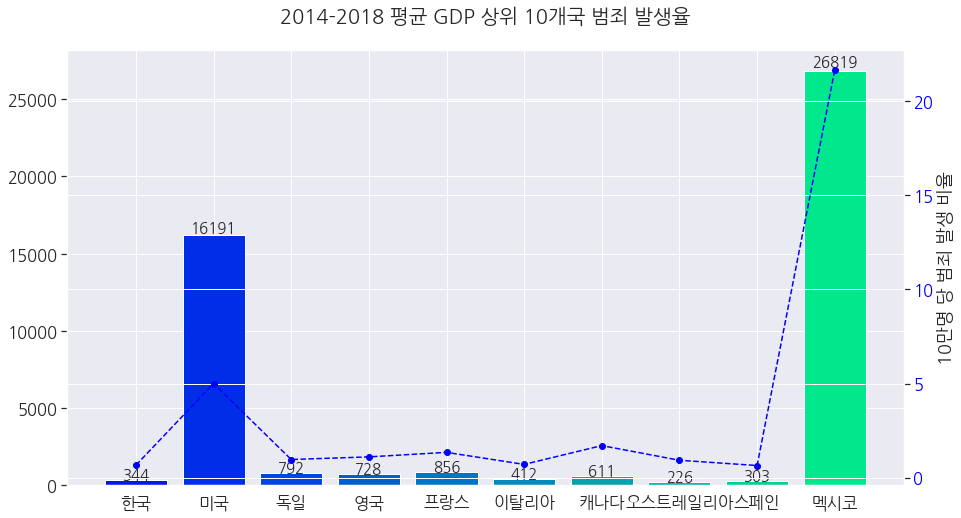

In [84]:
fig = plt.figure(figsize=(15,8)) ## Figure 생성 
fig.set_facecolor('white') ## Figure 배경색 지정
ax1 = fig.add_subplot() ## axes 생성
 
colors = sns.color_palette('winter', len(country_GDP10_OECD)) ## 바 차트 색상
 
xtick_label_position = list(range(len(country_GDP10_OECD))) ## x축 눈금 라벨이 표시될 x좌표
ax1.set_xticks(xtick_label_position) ## x축 눈금 
ax1.set_xticklabels(country_GDP10_OECD) ## x축 눈금 라벨
ax1.bar(xtick_label_position, country_GDP10_OECD_num, color=colors) ## 바차트 출력
 
color = 'blue'
ax2 = ax1.twinx() ## 새로운 axis 생성
ax2.plot(xtick_label_position, country_GDP10_OECD_rate, color=color, linestyle='--', marker='o') ## 선 그래프 
ax2.tick_params(axis='y', labelcolor=color) ## 눈금 라벨 색상 지정

for p in ax1.patches: #막대그래프 개수만큼 반복
    left, bottom, width, height = p.get_bbox().bounds
    ax1.annotate("%.0f" %(height), (left+width/2, height*1.01), ha='center', fontsize=15) #값 표시

plt.xlabel('국가')
plt.ylabel('10만명 당 범죄 발생 비율')
 
plt.title('2014-2018 평균 GDP 상위 10개국 범죄 발생율\n', fontsize=20)
plt.show()

### 2) GDP 상위 10개국의 행복지수

In [ ]:
# 2019년 kaggle 데이터셋 기준
# GDP - KOSIS 데이터셋 기준

In [85]:
country_positive10_OECD = pd.read_csv('/content/drive/MyDrive/빅데이터프로그래밍/2019.csv', encoding='cp949')
country_positive10_OECD

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298
...,...,...,...,...,...,...,...,...,...
151,152,Rwanda,3.334,0.359,0.711,0.614,0.555,0.217,0.411
152,153,Tanzania,3.231,0.476,0.885,0.499,0.417,0.276,0.147
153,154,Afghanistan,3.203,0.350,0.517,0.361,0.000,0.158,0.025
154,155,Central African Republic,3.083,0.026,0.000,0.105,0.225,0.235,0.035


In [86]:
country_positive10_OECD = ['한국','미국','독일','영국','프랑스','이탈리아','캐나다','오스트레일리아','스페인','멕시코']
country_positive10_OECD_score = [5.895, 6.892, 6.985, 7.054, 6.592, 6.223, 7.278, 7.228, 6.354, 6.595]


Text(0.5, 1.0, 'GDP 상위 10개국(OECD) 행복지수\n')

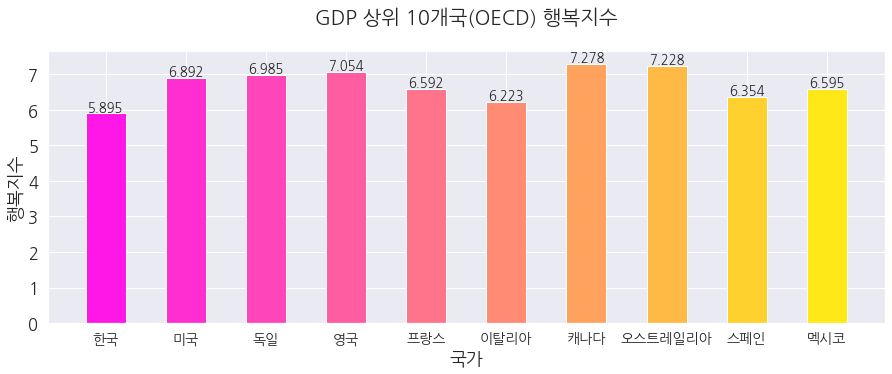

In [110]:
fig = plt.figure(figsize=(15,5)) ## Figure 생성 
fig.set_facecolor('white') ## Figure 배경색 지정
ax1 = fig.add_subplot() ## axes 생성
 
colors = sns.color_palette('spring', len(country_positive10_OECD)) ## 바 차트 색상
 
xtick_label_position = list(range(len(country_positive10_OECD))) ## x축 눈금 라벨이 표시될 x좌표
ax1.set_xticks(xtick_label_position) ## x축 눈금 
ax1.set_xticklabels(country_positive10_OECD, fontsize=14) ## x축 눈금 라벨
ax1.bar(xtick_label_position, country_positive10_OECD_score, color=colors, width=0.5) ## 바차트 출력

for p in ax1.patches: #막대그래프 개수만큼 반복
    left, bottom, width, height = p.get_bbox().bounds
    ax1.annotate("%.3f" %(height), (left+width/2, height*1.01), ha='center', fontsize=13) #값 표시

plt.xlabel('국가')
plt.ylabel('행복지수')
plt.title('GDP 상위 10개국(OECD) 행복지수\n', fontsize=20)

In [ ]:
# GDP와 상관관계가 있는가?